
<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 5</p><h1>

# Basic aggregation methods:

* ``count()``
* ``mean()``
* ``median()``
* ``min()``
* ``max()``
* ``std()``
* ``var()``
* ``sum()``
* ``idxmin()``
* ``idxmax()``
* ``corr()``

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(0,100,size=(7,5)),
                  columns=["x1","x2","x3","x4","x5"])
df

,x1,x2,x3,x4,x5
0,51,92,14,71,60
1,20,82,86,74,74
2,87,99,23,2,21
3,52,1,87,29,37
4,1,63,59,20,32
5,75,57,21,88,48
6,90,58,41,91,59


In [3]:
df.count() #her sutunda kac satir oldugunu soyledi

x1    7
x2    7
x3    7
x4    7
x5    7
dtype: int64

In [4]:
df.x1.count()

7

In [5]:
df.mean()

x1    53.714286
x2    64.571429
x3    47.285714
x4    53.571429
x5    47.285714
dtype: float64

In [6]:
df.x2.mean()

64.57142857142857

In [7]:
df.median()

x1    52.0
x2    63.0
x3    41.0
x4    71.0
x5    48.0
dtype: float64

In [8]:
df.min()

x1     1
x2     1
x3    14
x4     2
x5    21
dtype: int64

In [9]:
df.idxmax() #her sutundaki max degerin satirini verir
#argmax dataframe icinde uygulanamaz, onun yerine idxmax veya idxmin kullanilir

x1    6
x2    2
x3    3
x4    6
x5    1
dtype: int64

In [10]:
df.x2.idxmax() #ilgili sutunda max deger nerdeyse onu gosterir

2

In [11]:
df.x2.argmax()

2

In [12]:
df[["x1","x2"]].std()

x1    33.673502
x2    32.623392
dtype: float64

In [13]:
df.var()

x1    1133.904762
x2    1064.285714
x3     940.238095
x4    1282.952381
x5     340.571429
dtype: float64

In [14]:
pd.DataFrame(df.var())

,0
x1,1133.904762
x2,1064.285714
x3,940.238095
x4,1282.952381
x5,340.571429


In [15]:
df

,x1,x2,x3,x4,x5
0,51,92,14,71,60
1,20,82,86,74,74
2,87,99,23,2,21
3,52,1,87,29,37
4,1,63,59,20,32
5,75,57,21,88,48
6,90,58,41,91,59


In [16]:
df.sum(axis=0) #dataframe o sutuna ait tum rowlari toplar

x1    376
x2    452
x3    331
x4    375
x5    331
dtype: int64

In [17]:
df.sum(axis=1) #o satirdaki sutunlari toplar

0    288
1    336
2    232
3    206
4    175
5    289
6    339
dtype: int64

# Groupby  & Aggregation

## DataFrame.groupby()

The ``groupby`` method allows you to group rows of data together and call aggregate functions

Now you can use the ``.groupby()`` method to group rows together based off of a column name. This will create a DataFrameGroupBy object:

- groupby da sıralama önemli. ilk ne yazarsanız, ilk önce ona göre gruplar sonra ikinci sırada yazdıgınızı cıkan sonuc üstünde gruplar.

In [18]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
df.groupby("species") #gorebilmek icin gruplayip ne yapacagini yazmamiz lazim 

In [20]:
df.groupby("species").mean() #

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [21]:
df.groupby("species").describe() #hepsini okuyabilmek icin transpose yapmak lazim 

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [22]:
df.groupby("species").describe().T #transpose yapinca tum sutunlari okuyabiliyoruz 

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [23]:
df.groupby('species')[['sepal_length']].sum()

,sepal_length
species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [24]:
df.groupby('species')[['sepal_length','sepal_width']].sum()

,sepal_length,sepal_width
species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [25]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'GOOG', 'MSFT', 'GOOG', 'MSFT'],
        'Department':['HR', 'IT', 'IT', 'HR', 'HR', 'IT', 'IT', 'HR'],
        'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah', 'Tom', 'Terry'],
        'Age':[30, 28, 35, 40, 42, 25, 32, 48],
        'Sales':[200, 120, 340, 124, 243, 350, 180, 220]}

In [26]:
df1 = pd.DataFrame(data)
df1

,Company,Department,Person,Age,Sales
0,GOOG,HR,Sam,30,200
1,GOOG,IT,Charlie,28,120
2,MSFT,IT,Amy,35,340
3,MSFT,HR,Vanessa,40,124
4,GOOG,HR,Carl,42,243
5,MSFT,IT,Sarah,25,350
6,GOOG,IT,Tom,32,180
7,MSFT,HR,Terry,48,220


In [27]:
df1.groupby('Company').mean()

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [28]:
df1.groupby('Company')[["Sales"]].mean()

,Sales
Company,
GOOG,185.75
MSFT,258.50


In [29]:
df1.groupby(['Company','Department']).mean()

Age  Sales
Company Department             
GOOG    HR          36.0  221.5
        IT          30.0  150.0
MSFT    HR          44.0  172.0
        IT          30.0  345.0

In [30]:
df1.groupby(['Company','Department'])[["Sales"]].mean() 

Sales
Company Department       
GOOG    HR          221.5
        IT          150.0
MSFT    HR          172.0
        IT          345.0

In [31]:
by_comp=df1.groupby("Company")
by_comp

In [32]:
by_comp.mean()

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


# DataFrame/Series Operations

- ### `.aggregate()/agg()`
- ### `.filter()`
- ### `.transform()`
- ### `.apply()`
- ### `.applymap()`
- ### `.map()`
- ### `.pivot() & .pivot_table()`
- ### `.stack() & .unstack()`

## ``.aggregate()/agg()``

### DataFrame.agg()

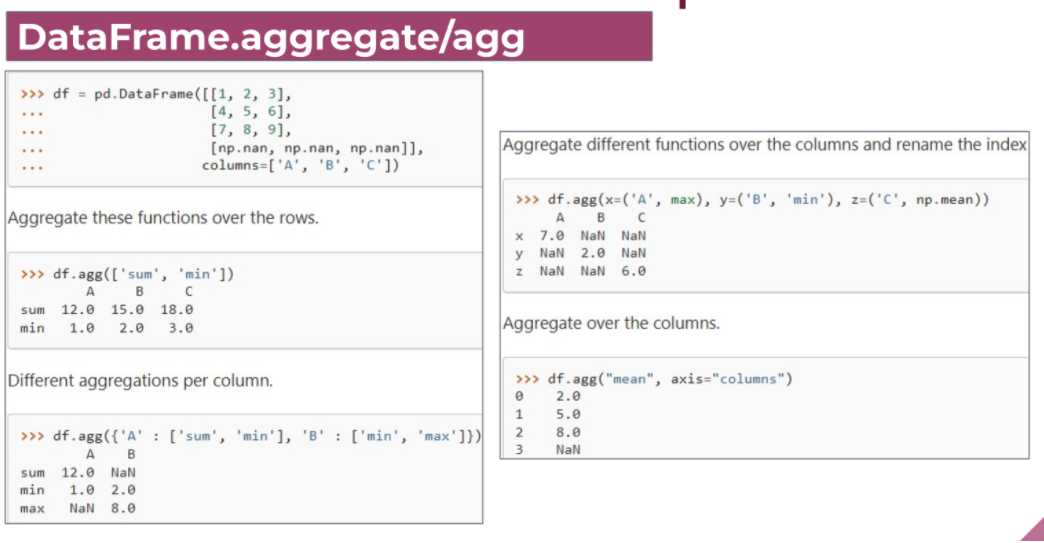

In [33]:
df2 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10, 23, 33, 22, 11, 99, 76, 84, 45],
                   'var2': [100, 253, 333, 262, 111, 969, 405, 578, 760]})
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [34]:
df2.agg([sum,min]) #ilgili sutunlarin hepsine uygular

,groups,var1,var2
sum,ABCABCABC,403,3771
min,A,10,100


In [35]:
df2.agg(["sum","min"]) #bazen .np olarak calisiyor, bazen string de kabul ediyor, tirnaksiz da olur

,groups,var1,var2
sum,ABCABCABC,403,3771
min,A,10,100


In [36]:
df2[["var1","var2"]].agg([sum])

,var1,var2
sum,403,3771


In [37]:
df2.agg({"var1":[sum],"var2":[min]})

,var1,var2
sum,403.0,NaN
min,NaN,100.0


In [38]:
df2.agg({"var1":[sum,np.mean],"var2":[min,max]})

,var1,var2
sum,403.000000,NaN
mean,44.777778,NaN
min,NaN,100.0
max,NaN,969.0


### DataFrame.groupby().agg()

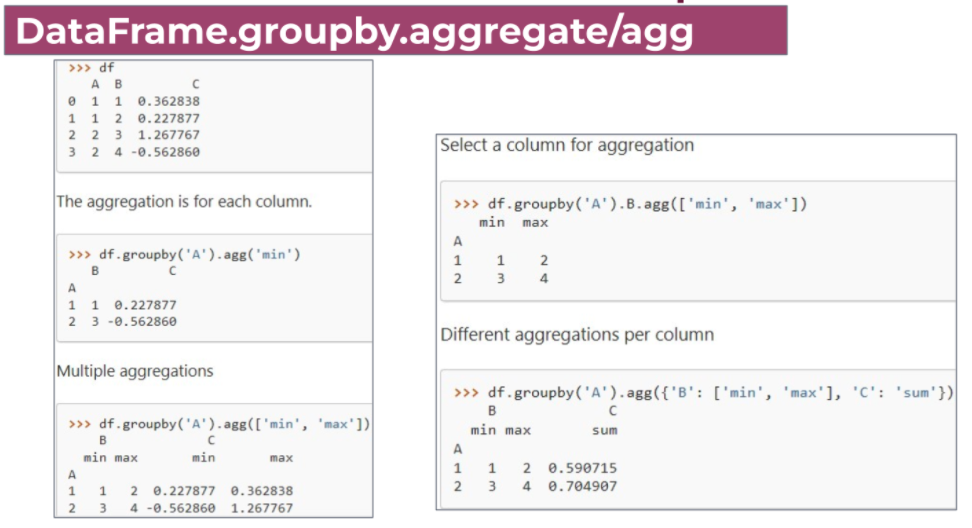

In [39]:
df2.groupby("groups").agg([np.mean,np.median,np.max])

var1                    var2            
             mean median amax        mean median amax
groups                                               
A       36.000000   22.0   76  255.666667  262.0  405
B       39.333333   23.0   84  314.000000  253.0  578
C       59.000000   45.0   99  687.333333  760.0  969

In [40]:
df2.groupby("groups").agg([np.mean,np.median,max])

var1                   var2            
             mean median max        mean median  max
groups                                              
A       36.000000   22.0  76  255.666667  262.0  405
B       39.333333   23.0  84  314.000000  253.0  578
C       59.000000   45.0  99  687.333333  760.0  969

In [41]:
df2.groupby("groups").agg({"var1":[min,"max"],"var2":"median"})

var1       var2
        min max median
groups                
A        10  76  262.0
B        11  84  253.0
C        33  99  760.0

In [42]:
df2.groupby("groups")["var1"].agg([min,"max"])

,min,max
groups,,
A,10,76
B,11,84
C,33,99


## .filter()

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html

https://www.sharpsightlabs.com/blog/pandas-filter/

### DataFrame.filter()

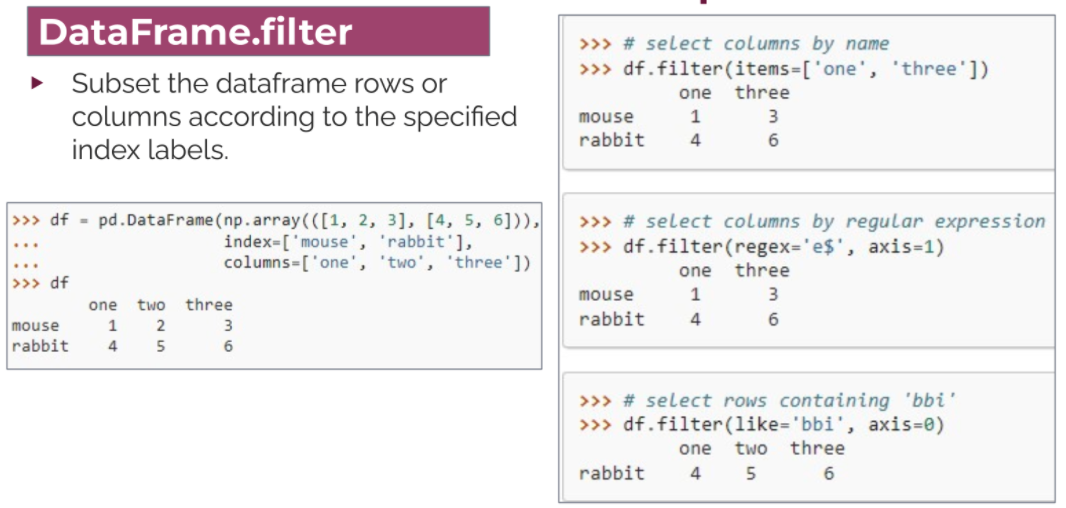

In [43]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [44]:
df2.filter(["groups","var1"])  #alternatif farkli sekilde de yazabiliriz

,groups,var1
0,A,10
1,B,23
2,C,33
3,A,22
4,B,11
5,C,99
6,A,76
7,B,84
8,C,45


In [45]:
df2[["groups","var1"]]

,groups,var1
0,A,10
1,B,23
2,C,33
3,A,22
4,B,11
5,C,99
6,A,76
7,B,84
8,C,45


In [46]:
df2.filter(regex="^var") #regex string ifade icinde istedigin bolumu almak demek
# ^ yapinca var ile baslayan sutunlari getirir

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [47]:
df2.filter(like='var', axis=1) 

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [48]:
df2.filter(like="S", axis=0)

,groups,var1,var2


In [49]:
df = pd.DataFrame(np.array(([1, 2, 3], [4, 5, 6])),index=['mouse', 'rabbit'],columns=['one', 'two', 'three'])
df

,one,two,three
mouse,1,2,3
rabbit,4,5,6


In [50]:
df.filter(regex='e$', axis=1)  #icinde e olanlari alir

,one,three
mouse,1,3
rabbit,4,6


In [51]:
df.filter(like='bbi', axis=0)

,one,two,three
rabbit,4,5,6


### DataFrame.groupby().filter()

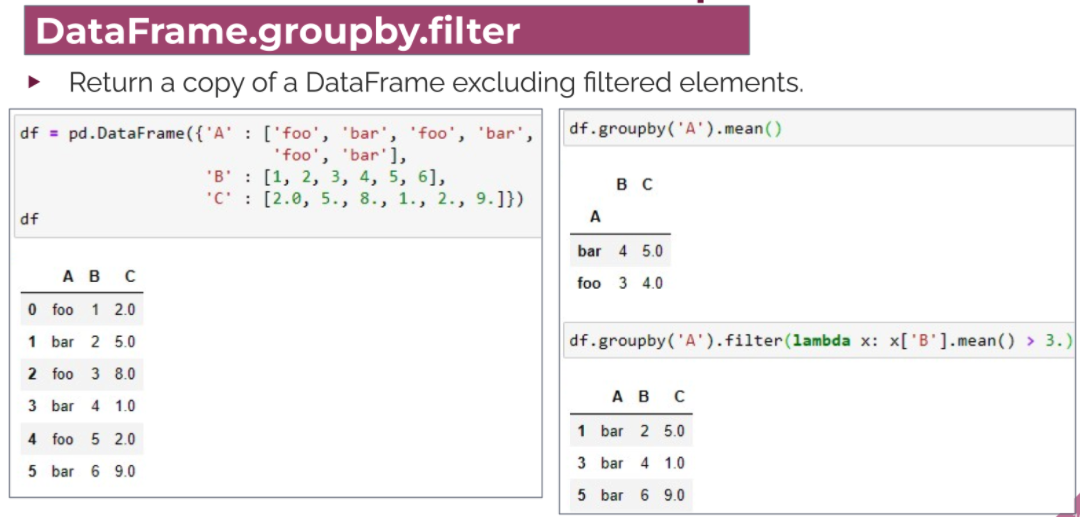

In [52]:
df2.groups.unique()

array(['A', 'B', 'C'], dtype=object)

In [53]:
df2.groupby("groups").mean()

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [54]:
def filter_func(x):
    return x["var1"].mean() > 39

In [55]:
df2.groupby("groups").filter(filter_func)

,groups,var1,var2
1,B,23,253
2,C,33,333
4,B,11,111
5,C,99,969
7,B,84,578
8,C,45,760


In [56]:
df2.groupby("groups").sum()

,var1,var2
groups,,
A,108,767
B,118,942
C,177,2062


In [57]:
df2.groupby("groups").filter(lambda x: x["var2"].sum()<800)  #var2 sutununda 800den kucuk satirlari getir

,groups,var1,var2
0,A,10,100
3,A,22,262
6,A,76,405


## .transform()

Python’s Transform function returns a self-produced dataframe with transformed values after applying the function specified in its parameter. This dataframe has the same length as the passed dataframe.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html

https://www.analyticsvidhya.com/blog/2020/03/understanding-transform-function-python/

### DataFrame.transform()

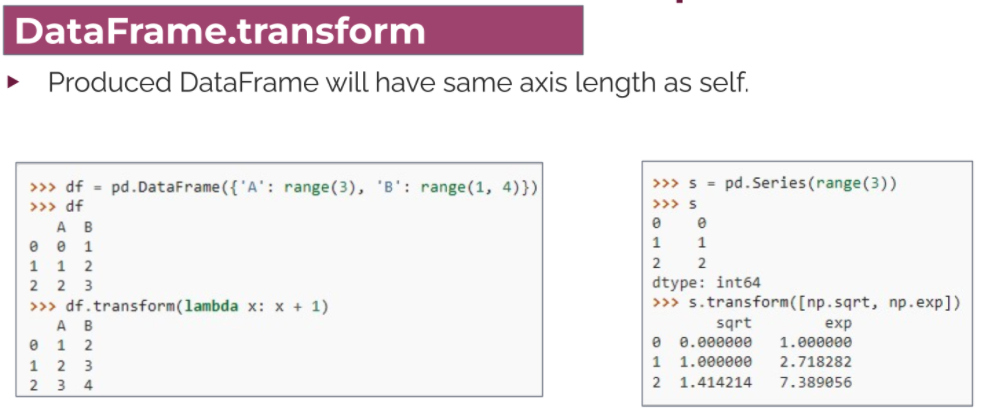

In [58]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [59]:
df_num=df2.iloc[:,1:]
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [60]:
df_num.transform(lambda x: x+10) #her hucreye +10 ekledi
#df_num+ 10 #tum satirlara 10 ekledi 

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [61]:
df_num.transform(lambda x: x+10)

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [62]:
df_num.transform(lambda x : (x-x.mean()) / x.std())
# (df_num-df_num.mean())/df_num.std() bir onceki islemle ayni islemi yapar

,var1,var2
0,-1.040605,-1.078044
1,-0.651625,-0.560989
2,-0.352409,-0.290633
3,-0.681547,-0.530573
4,-1.010684,-1.040870
5,1.622413,1.858697
6,0.934218,-0.047312
7,1.173590,0.537332
8,0.006649,1.152392


In [63]:
df_num["var1"].transform([np.sqrt, np.exp]) #tek sutundan iki ayri fonksiyon calistirarak 2 sutun yapti

,sqrt,exp
0,3.162278,2.202647e+04
1,4.795832,9.744803e+09
2,5.744563,2.146436e+14
3,4.690416,3.584913e+09
4,3.316625,5.987414e+04
5,9.949874,9.889030e+42
6,8.717798,1.014800e+33
7,9.165151,3.025077e+36
8,6.708204,3.493427e+19


### DataFrame.groupby().transform()

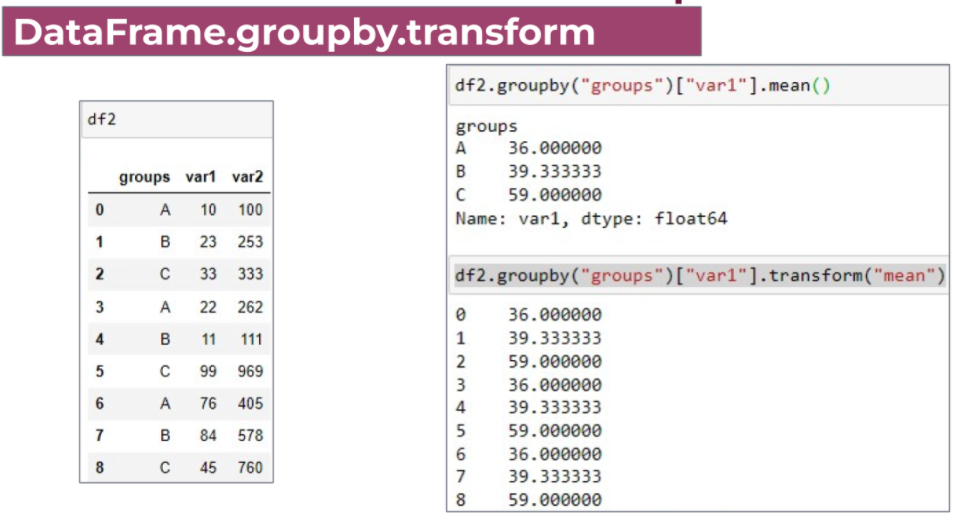

In [64]:
## gruplara gore her bir ortalama degeri hayali bir sutun olusturdu, 
# kac satir varsa o kadar satir dondurdu 

In [65]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [66]:
df2.groupby("groups")["var1"].mean()

groups
A    36.000000
B    39.333333
C    59.000000
Name: var1, dtype: float64

In [67]:
df2.groupby("groups")["var1"].transform("mean") #metotlar tirnak ile parantez icine yazilmali

0    36.000000
1    39.333333
2    59.000000
3    36.000000
4    39.333333
5    59.000000
6    36.000000
7    39.333333
8    59.000000
Name: var1, dtype: float64

In [68]:
df2["var1_mean_transform"] = df2.groupby("groups")["var1"].transform("mean")
df2


,groups,var1,var2,var1_mean_transform
0,A,10,100,36.000000
1,B,23,253,39.333333
2,C,33,333,59.000000
3,A,22,262,36.000000
4,B,11,111,39.333333
5,C,99,969,59.000000
6,A,76,405,36.000000
7,B,84,578,39.333333
8,C,45,760,59.000000


In [69]:
df2["var2_median_transform"] = df2.groupby("groups")["var2"].transform("median")
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform
0,A,10,100,36.000000,262.0
1,B,23,253,39.333333,253.0
2,C,33,333,59.000000,760.0
3,A,22,262,36.000000,262.0
4,B,11,111,39.333333,253.0
5,C,99,969,59.000000,760.0
6,A,76,405,36.000000,262.0
7,B,84,578,39.333333,253.0
8,C,45,760,59.000000,760.0


<h1><p style="text-align: center;">Pandas Lesson, Session - 6</p><h1>

## .apply()

### Series.apply() - df["col"].apply()

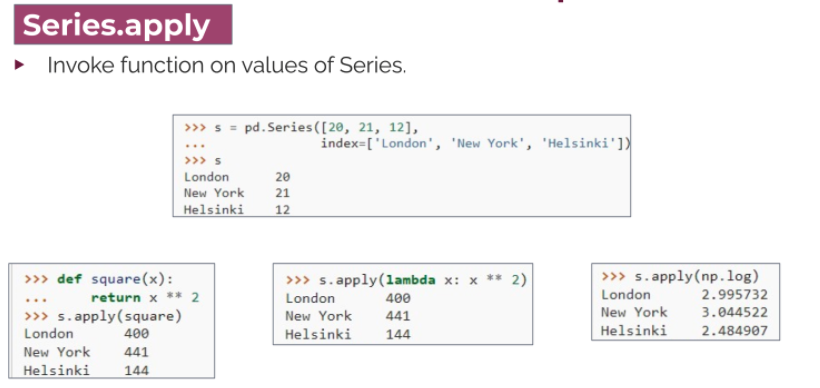

In [70]:
df3 = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [71]:
def squared(x):
    return x**2

In [72]:
df3["col1"].apply(squared)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

In [73]:
df3["col2"].apply(np.log)

0    6.095825
1    6.318968
2    6.501290
3    6.095825
Name: col2, dtype: float64

In [74]:
df3["col3"].apply(len)

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [75]:
df3["col3"].apply(lambda x: x[0]*3 )  #hepsinin ilk harfini 3 kere yazdi

0    aaa
1    ddd
2    ggg
3    xxx
Name: col3, dtype: object

In [76]:
df3["col2"].apply(lambda x: "high" if x>500 else "low" ) #2.sutunda 500den kucukse "low" buyukse "high"

0     low
1    high
2    high
3     low
Name: col2, dtype: object

### DataFrame.apply()

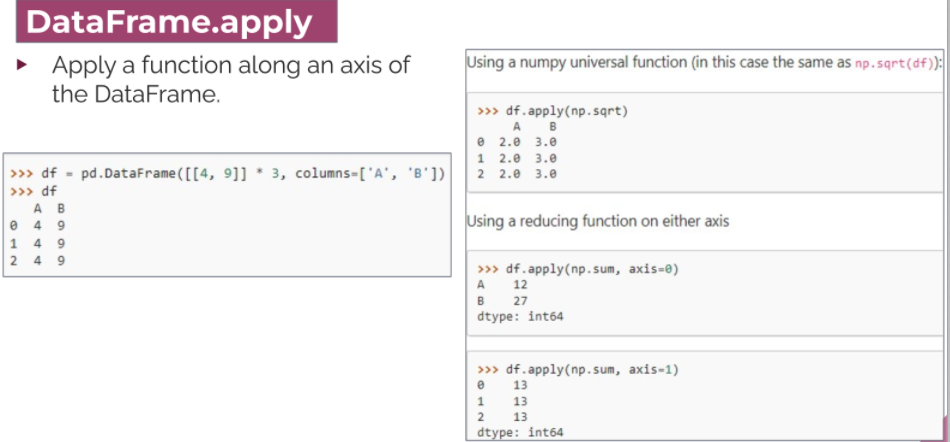

In [77]:
df2

,groups,var1,var2,var1_mean_transform,var2_median_transform
0,A,10,100,36.000000,262.0
1,B,23,253,39.333333,253.0
2,C,33,333,59.000000,760.0
3,A,22,262,36.000000,262.0
4,B,11,111,39.333333,253.0
5,C,99,969,59.000000,760.0
6,A,76,405,36.000000,262.0
7,B,84,578,39.333333,253.0
8,C,45,760,59.000000,760.0


In [78]:
df2.drop(["var1_mean_transform", "var2_median_transform"], axis=1, inplace=True)

# son sutunlari sildik, inplace ile kalici yaptik 

In [79]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [80]:
df2.apply(np.sum, axis=0) #islem sutununa git, her sutunu kendi icinde topla

groups    ABCABCABC
var1            403
var2           3771
dtype: object

In [81]:
#df2.apply(np.sum, axis=1) islem hata verir, int ve str toplanamaz 

In [82]:
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [83]:
df_num.apply(np.sum, axis=0) #sutun sutun topladi 

var1     403
var2    3771
dtype: int64

In [84]:
df_num.apply(np.sum, axis=1) #sutunlari yanyana topladi 

0     110
1     276
2     366
3     284
4     122
5    1068
6     481
7     662
8     805
dtype: int64

In [85]:
df2.groupby("groups").mean()

,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


In [86]:
df2.groupby("groups").apply(np.mean)

/Users/bzb/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/bzb/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,var1,var2
groups,,
A,36.000000,255.666667
B,39.333333,314.000000
C,59.000000,687.333333


### DataFrame.applymap()

applymap() is only available in DataFrame and used for element-wise operation across the whole DataFrame. It has been optimized and some cases work **much faster than apply()**

applymap() method only works on a pandas dataframe where function is applied on every element individually. apply() method can be applied both to series and dataframes where function can be applied both series and individual elements based on the type of function provided.

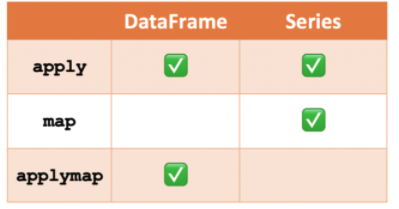

In [87]:
df_num


,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [88]:
#df_num.applymap(lambda x: x*5)
#df_num.apply(lambda x: x*5)
df_num*5

,var1,var2
0,50,500
1,115,1265
2,165,1665
3,110,1310
4,55,555
5,495,4845
6,380,2025
7,420,2890
8,225,3800


In [89]:
df_num.applymap(lambda x: len(str(x*5))) #5ile carpip, stringe cevirip, uzunlugunu aldi

,var1,var2
0,2,3
1,3,4
2,3,4
3,3,4
4,2,3
5,3,4
6,3,4
7,3,4
8,3,4


In [90]:
df_num.apply(lambda x: len(str(x*5))) #sutun olarak(sacma(!)) bir sonuc verir 

var1    105
var2    114
dtype: int64

## .map()
### Series.map() - df["col"].map()

Python's map() is a built-in function that allows you to process and transform all the items in an iterable without using an explicit for loop, a technique commonly known as mapping. map() is useful when you need to apply a transformation function to each item in an iterable and transform them into a new iterable.

https://realpython.com/python-map-function/#:~:text=Python's%20map()%20is%20a,them%20into%20a%20new%20iterable.

The map() function is used to map values of Series according to input correspondence. Used for substituting each value in a Series with another value, that may be derived from a function, a dict or a Series.

map() accepts a dict or a Series. Values that are not found in the dict are converted to NaN, unless
the dict has a default value.

https://www.w3resource.com/pandas/series/series-map.php

#o serinin elemanlarini istenen yere atar

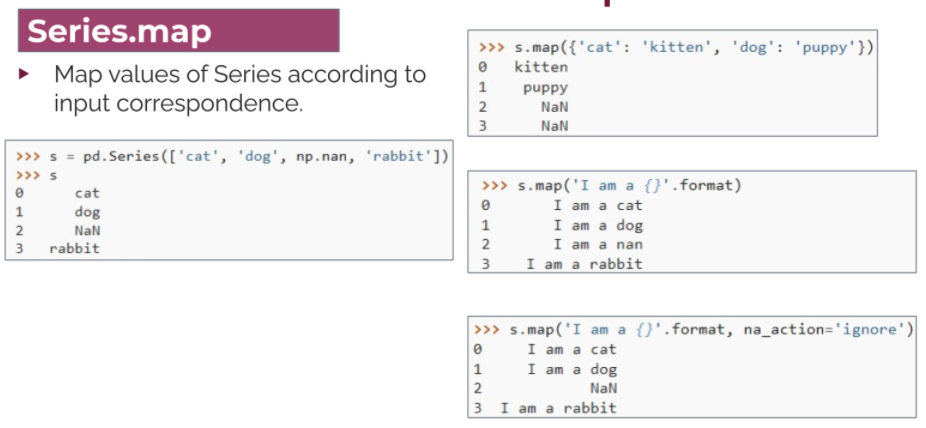

In [91]:
df3 #kensisine uygulayamayiz, kolon cekmemiz lazim 

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [92]:
df3.col1.map({1:"A",2:"B"}) #atama yapilmayanlari NaN olarak gosterir

0      A
1      B
2    NaN
3    NaN
Name: col1, dtype: object

In [93]:
s = pd.Series(['fox', 'cow', np.nan, 'dog'])
s

0    fox
1    cow
2    NaN
3    dog
dtype: object

In [94]:
s.map("I am a {}".format) 

0    I am a fox
1    I am a cow
2    I am a nan
3    I am a dog
dtype: object

In [95]:
s.map("I am a {}".format, na_action="ignore")
#na_action="ignore"  icerde NaN deger varsa ona herhangi bir atama yapmaz 

0    I am a fox
1    I am a cow
2           NaN
3    I am a dog
dtype: object

In [96]:
s.map(lambda x: f"I am a {x}", na_action="ignore")

0    I am a fox
1    I am a cow
2           NaN
3    I am a dog
dtype: object

- **apply()** is used to apply a function along an axis of the DataFrame or on values of Series.
- **applymap()** is used to apply a function to a DataFrame elementwise.
- **map()** is used to substitute each value in a Series with another value.

https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff#:~:text=apply()%20is%20used%20to,a%20Series%20with%20another%20value.

https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas

## df.transform() vs df.apply()

- Both apply() and transform() can be used to manipulate the entire DataFrame.

- Both apply() and transform() support lambda expression.

- Both apply() and transform() can be used for manipulating a single column.

In [97]:
df5 = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
df5

,A,B
0,1,10
1,2,20
2,3,30


In [98]:
df5.apply(lambda x: x+10) 

,A,B
0,11,20
1,12,30
2,13,40


In [99]:
df5.transform(lambda x: x+10) 

,A,B
0,11,20
1,12,30
2,13,40


In [100]:
df5['B_ap'] = df5['B'].apply(lambda x: x+10)
df5['B_tr'] = df5['B'].transform(lambda x: x+10)
df5 #apply ve transform farkini gostermek icin islemler ile yeni sutunlar eklendi

,A,B,B_ap,B_tr
0,1,10,20,20
1,2,20,30,30
2,3,30,40,40


### Differences between .apply() and .transform() when manupulating data
(1) transform() works with function, a string function, a list of functions, and a dict. However, apply() is only allowed with function.

(2) transform() cannot produce aggregated results.

(3) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

In [101]:
df5=df5[["A","B"]]
df5

,A,B
0,1,10
1,2,20
2,3,30


transform icinde np.mean, "mean"ile yazabiliriz
        - aggregate-siniflandirma- yapmaz, (ayni uzunlukta veri dondurur)
        - sadece tek seri icin kullanabiliriz
        
 apply: ayni anda birden fazla seri kullanabiliriz 

In [102]:
df5.transform("sqrt")
# df5.apply("sqrt")   # hata verir ! ! ! ! ! !


,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


In [103]:
# df5.transform(np.sqrt)
df5.apply(np.sqrt)

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


In [104]:
df5.transform(np.sqrt)

,A,B
0,1.000000,3.162278
1,1.414214,4.472136
2,1.732051,5.477226


In [105]:
#df5.transform([np.sqrt, np.exp]) 
df5.apply([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [106]:
df5.transform({'A': np.sqrt, 'B': np.exp})
#df5.apply({'A': np.sqrt, 'B': np.exp})

,A,B
0,1.000000,2.202647e+04
1,1.414214,4.851652e+08
2,1.732051,1.068647e+13


In [107]:
df5.apply(lambda x: x.sum())  #sutunlari kendi icinde topladi
# df5.transform(lambda x:x.sum()) 
# Transform sutun bazinda islem yapamadigi icin gives an error ! ! ! 

A     6
B    60
dtype: int64

In [108]:
df5.apply(lambda x: x["B"]-x["A"], axis=1)
# df5.transform(lambda x: x["B"]-x["A"], axis=1) # gives an error
# transform birden fazla serinin adi gectigi icin hata verir

0     9
1    18
2    27
dtype: int64

### Differences Between .apply() and .transform() when using them in conjunction with groupby()
(1) transform() returns a DataFrame that has the same length as the input

(2) apply() works with multiple Series at a time. But, transform() is only allowed to work with a single Series at a time.

In [109]:
df6 = pd.DataFrame({'key': ['a','b','c'] * 3,
                    'A': np.arange(9),
                    'B': [1,2,3] * 3})
df6

,key,A,B
0,a,0,1
1,b,1,2
2,c,2,3
3,a,3,1
4,b,4,2
5,c,5,3
6,a,6,1
7,b,7,2
8,c,8,3


In [110]:
df6.groupby("key")["A"].sum()

key
a     9
b    12
c    15
Name: A, dtype: int64

In [111]:
df6.groupby("key")["A"].apply(lambda x: x.sum())

key
a     9
b    12
c    15
Name: A, dtype: int64

In [112]:
df6.groupby("key")["A"].transform(lambda x: x.sum()) #ayni uzunluka seri dondurur
#missing value oldugunda dataframe icinde transform kullanmak cok yararli

0     9
1    12
2    15
3     9
4    12
5    15
6     9
7    12
8    15
Name: A, dtype: int64

In [113]:
df6.groupby('key').apply(lambda x: x["B"]-x["A"])
# df6.groupby('key').transform(lambda x: x["B"]-x["A"]) # gives an error ! ! ! ! 

key   
a    0    1
     3   -2
     6   -5
b    1    1
     4   -2
     7   -5
c    2    1
     5   -2
     8   -5
dtype: int64

In [114]:
# element element islem icin "applymap" 
# dataframe'de sutun sutun, seride eleman eleman icin "apply" 
# dataframe normal uzunlugunda donus almak icin 'transform' 

# pivot() vs pivot_table()

- Pivot_table is a generalization of pivot that can handle duplicate values for one pivoted index/column pair.

- Pivot_table will only allow numeric types as "values=", whereas pivot will take string types as "values=".

- Pivot_table also supports using multiple columns for the index. 

In [115]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}
df7 = pd.DataFrame(data)
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [116]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age'],
                aggfunc='mean')
#pivot table birden fazla benzer baslik oldugunda aggregate eder,
#pivot kullanmak icin birden fazla ayni baslik olmamasi gerekir, yoksa yanlis deger verir 

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [117]:
# pivot table:   sadece numeric degerlerle ugrasir 
# pivot: str degerleri de tablo icine alabilir

#dublicate degerler yoksa pivot ve pivot_table ayni sonucu verir 

In [118]:
df7.pivot(index='gender',
          columns='sport',
          values=['age']) #aggfunc olmadigi icin dublicate verileri bir araya getiremiyor 

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [119]:
df7.pivot(index='gender',
          columns='sport',
          values='status') 

sport,basketball,football,tennis,voleyball
gender,,,,
female,professional,NaN,professional,amateur
male,amateur,amateur,professional,NaN


In [120]:
# df7.pivot_table(index='gender',
#           columns='sport',
#           values='status')
# str degerlerden dolayi hata verdi 

# aggfunc= default 'mean' verir 

In [121]:
df7.loc[2,"sport"] = "tennis"
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [122]:
df7.pivot_table(index='gender',
                columns='sport',
                values=['age','height','weight'],
                aggfunc='mean')

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN   25.0      22.0        NaN      NaN  173.5   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0        NaN      NaN   60.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [123]:
df7.pivot(index='gender',
                columns='sport',
                values=['age','height','weight']) #dublicate degerlerden dolayi hata verdi 

ValueError: Index contains duplicate entries, cannot reshape

In [124]:
df7.pivot(columns='sport',
            values=['age','height','weight'])
#index kaldirinca herseyi teker teker getirerek calisti 

age                               height                  \
sport basketball football tennis voleyball basketball football tennis   
0            NaN      NaN   20.0       NaN        NaN      NaN  185.0   
1            NaN      NaN   24.0       NaN        NaN      NaN  172.0   
2            NaN      NaN   26.0       NaN        NaN      NaN  175.0   
3            NaN     23.0    NaN       NaN        NaN    178.0    NaN   
4            NaN      NaN    NaN      22.0        NaN      NaN    NaN   
5           21.0      NaN    NaN       NaN      196.0      NaN    NaN   

                    weight                            
sport voleyball basketball football tennis voleyball  
0           NaN        NaN      NaN   83.0       NaN  
1           NaN        NaN      NaN   58.0       NaN  
2           NaN        NaN      NaN   62.0       NaN  
3           NaN        NaN     80.0    NaN       NaN  
4         182.0        NaN      NaN    NaN      65.0  
5           NaN       90.0      NaN    NaN       NaN

In [125]:
df7.groupby(["gender","sport"]).mean()

age  height  weight
gender sport                           
female tennis      25.0   173.5    60.0
       voleyball   22.0   182.0    65.0
male   basketball  21.0   196.0    90.0
       football    23.0   178.0    80.0
       tennis      20.0   185.0    83.0

In [126]:
df7.pivot_table(index=['gender', 'sport'],
                values=['age','height','weight'],
                aggfunc='mean')

age  height  weight
gender sport                          
female tennis       25   173.5      60
       voleyball    22   182.0      65
male   basketball   21   196.0      90
       football     23   178.0      80
       tennis       20   185.0      83

# .stack() & .unstack()

Reshaping the data using stack() function in pandas converts the data into stacked format .i.e. the column is stacked row wise. When more than one column header is present we can stack the specific column header by specified the level. unstack() function in pandas converts the data into unstacked format.

https://www.datasciencemadesimple.com/reshape-using-stack-unstack-function-pandas-python/

**why and when should use a stack() and unstack() methods?**

https://stackoverflow.com/questions/69139030/why-and-when-should-use-a-stack-and-unstack-methods

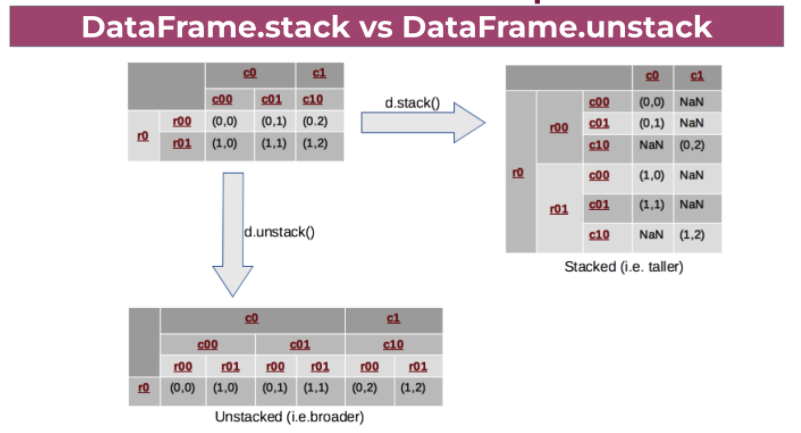

In [127]:
# stack: sutunlari indexe cevirir 
# unstack: indexleri sutuna cevirir 

In [128]:
df7["level"] = ["high", "high", "low", "high", "low", "low"]
df7

,gender,sport,status,age,height,weight,level
0,male,tennis,professional,20,185,83,high
1,female,tennis,professional,24,172,58,high
2,female,tennis,professional,26,175,62,low
3,male,football,amateur,23,178,80,high
4,female,voleyball,amateur,22,182,65,low
5,male,basketball,amateur,21,196,90,low


In [129]:
df8 = df7.pivot_table(index=['gender','sport'],
                columns=["status","level"],
                values=['age','height','weight'],
                aggfunc='mean')
df8

age                           height         \
status            amateur       professional       amateur          
level                high   low         high   low    high    low   
gender sport                                                        
female tennis         NaN   NaN         24.0  26.0     NaN    NaN   
       voleyball      NaN  22.0          NaN   NaN     NaN  182.0   
male   basketball     NaN  21.0          NaN   NaN     NaN  196.0   
       football      23.0   NaN          NaN   NaN   178.0    NaN   
       tennis         NaN   NaN         20.0   NaN     NaN    NaN   

                                       weight                           
status            professional        amateur       professional        
level                     high    low    high   low         high   low  
gender sport                                                            
female tennis            172.0  175.0     NaN   NaN         58.0  62.0  
       voleyball           NaN    NaN     NaN  65.0          NaN   NaN  
male   basketball          NaN    NaN     NaN  90.0          NaN   NaN  
       football            NaN    NaN    80.0   NaN          NaN   NaN  
       tennis            185.0    NaN     NaN   NaN         83.0   NaN

In [130]:
df8.stack() #en alttaki sutun basliklarini indexe cevirir 

age               height               weight  \
status                  amateur professional amateur professional amateur   
gender sport      level                                                     
female tennis     high      NaN         24.0     NaN        172.0     NaN   
                  low       NaN         26.0     NaN        175.0     NaN   
       voleyball  low      22.0          NaN   182.0          NaN    65.0   
male   basketball low      21.0          NaN   196.0          NaN    90.0   
       football   high     23.0          NaN   178.0          NaN    80.0   
       tennis     high      NaN         20.0     NaN        185.0     NaN   

                                      
status                  professional  
gender sport      level               
female tennis     high          58.0  
                  low           62.0  
       voleyball  low            NaN  
male   basketball low            NaN  
       football   high           NaN  
       tennis     high          83.0

In [131]:
df8.stack(level= -1 ) #level degeri default -1 gelir , tabloya gore level = 2 de diyebiliriz 

age               height               weight  \
status                  amateur professional amateur professional amateur   
gender sport      level                                                     
female tennis     high      NaN         24.0     NaN        172.0     NaN   
                  low       NaN         26.0     NaN        175.0     NaN   
       voleyball  low      22.0          NaN   182.0          NaN    65.0   
male   basketball low      21.0          NaN   196.0          NaN    90.0   
       football   high     23.0          NaN   178.0          NaN    80.0   
       tennis     high      NaN         20.0     NaN        185.0     NaN   

                                      
status                  professional  
gender sport      level               
female tennis     high          58.0  
                  low           62.0  
       voleyball  low            NaN  
male   basketball low            NaN  
       football   high           NaN  
       tennis     high          83.0


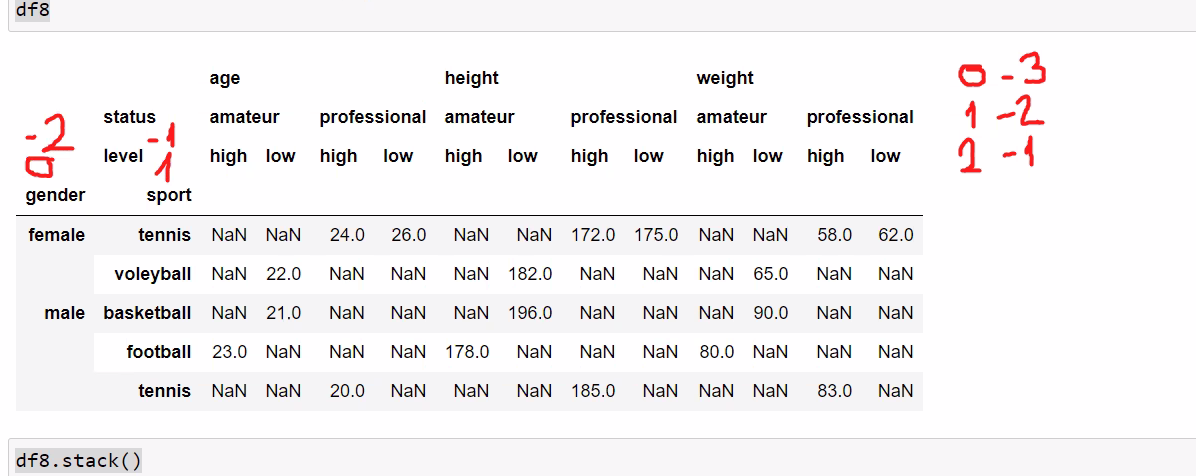

In [132]:
df8.stack(level= 1 ) # -2 de diyebiliriz,  status sutunlarini indexe atar 

age       height        weight      
level                           high   low   high    low   high   low
gender sport      status                                             
female tennis     professional  24.0  26.0  172.0  175.0   58.0  62.0
       voleyball  amateur        NaN  22.0    NaN  182.0    NaN  65.0
male   basketball amateur        NaN  21.0    NaN  196.0    NaN  90.0
       football   amateur       23.0   NaN  178.0    NaN   80.0   NaN
       tennis     professional  20.0   NaN  185.0    NaN   83.0   NaN

In [133]:
df8.stack(level= 0 ) 

status                   amateur        professional       
level                       high    low         high    low
gender sport                                               
female tennis     age        NaN    NaN         24.0   26.0
                  height     NaN    NaN        172.0  175.0
                  weight     NaN    NaN         58.0   62.0
       voleyball  age        NaN   22.0          NaN    NaN
                  height     NaN  182.0          NaN    NaN
                  weight     NaN   65.0          NaN    NaN
male   basketball age        NaN   21.0          NaN    NaN
                  height     NaN  196.0          NaN    NaN
                  weight     NaN   90.0          NaN    NaN
       football   age       23.0    NaN          NaN    NaN
                  height   178.0    NaN          NaN    NaN
                  weight    80.0    NaN          NaN    NaN
       tennis     age        NaN    NaN         20.0    NaN
                  height     NaN    NaN        185.0    NaN
                  weight     NaN    NaN         83.0    NaN

In [134]:
df8.stack().stack()  #sirayla 2 sefer indexe atti 

age  height  weight
gender sport      level status                            
female tennis     high  professional  24.0   172.0    58.0
                  low   professional  26.0   175.0    62.0
       voleyball  low   amateur       22.0   182.0    65.0
male   basketball low   amateur       21.0   196.0    90.0
       football   high  amateur       23.0   178.0    80.0
       tennis     high  professional  20.0   185.0    83.0

### Unstack ()

In [135]:
df8

age                           height         \
status            amateur       professional       amateur          
level                high   low         high   low    high    low   
gender sport                                                        
female tennis         NaN   NaN         24.0  26.0     NaN    NaN   
       voleyball      NaN  22.0          NaN   NaN     NaN  182.0   
male   basketball     NaN  21.0          NaN   NaN     NaN  196.0   
       football      23.0   NaN          NaN   NaN   178.0    NaN   
       tennis         NaN   NaN         20.0   NaN     NaN    NaN   

                                       weight                           
status            professional        amateur       professional        
level                     high    low    high   low         high   low  
gender sport                                                            
female tennis            172.0  175.0     NaN   NaN         58.0  62.0  
       voleyball           NaN    NaN     NaN  65.0          NaN   NaN  
male   basketball          NaN    NaN     NaN  90.0          NaN   NaN  
       football            NaN    NaN    80.0   NaN          NaN   NaN  
       tennis            185.0    NaN     NaN   NaN         83.0   NaN

In [136]:
df8.unstack() # indexten aldi, sutunlarin en altina ekledi, default en alta ekler 

age                                                       \
status    amateur                                                        
level        high                                  low                   
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN    NaN       NaN        NaN      NaN    NaN   
male          NaN     23.0    NaN       NaN       21.0      NaN    NaN   

                                        ...  weight                         \
status           professional           ... amateur           professional   
level                    high           ...     low                   high   
sport  voleyball   basketball football  ...  tennis voleyball   basketball   
gender                                  ...                                  
female      22.0          NaN      NaN  ...     NaN      65.0          NaN   
male         NaN          NaN      NaN  ...     NaN       NaN          NaN   

                                                                       
status                                                                 
level                                   low                            
sport  football tennis voleyball basketball football tennis voleyball  
gender                                                                 
female      NaN   58.0       NaN        NaN      NaN   62.0       NaN  
male        NaN   83.0       NaN        NaN      NaN    NaN       NaN  

[2 rows x 48 columns]

In [137]:
df8.unstack(level=0)

age                                                    height  \
status     amateur                    professional                   amateur   
level         high          low               high          low         high   
gender      female  male female  male       female  male female male  female   
sport                                                                          
basketball     NaN   NaN    NaN  21.0          NaN   NaN    NaN  NaN     NaN   
football       NaN  23.0    NaN   NaN          NaN   NaN    NaN  NaN     NaN   
tennis         NaN   NaN    NaN   NaN         24.0  20.0   26.0  NaN     NaN   
voleyball      NaN   NaN   22.0   NaN          NaN   NaN    NaN  NaN     NaN   

                   ...                    weight                     \
status             ... professional      amateur                      
level              ...          low         high          low         
gender       male  ...       female male  female  male female  male   
sport              ...                                                
basketball    NaN  ...          NaN  NaN     NaN   NaN    NaN  90.0   
football    178.0  ...          NaN  NaN     NaN  80.0    NaN   NaN   
tennis        NaN  ...        175.0  NaN     NaN   NaN    NaN   NaN   
voleyball     NaN  ...          NaN  NaN     NaN   NaN   65.0   NaN   

                                           
status     professional                    
level              high          low       
gender           female  male female male  
sport                                      
basketball          NaN   NaN    NaN  NaN  
football            NaN   NaN    NaN  NaN  
tennis             58.0  83.0   62.0  NaN  
voleyball           NaN   NaN    NaN  NaN  

[4 rows x 24 columns]

In [138]:
df8.unstack(level=1, fill_value= "-") 


age                                                       \
status    amateur                                                        
level        high                                  low                   
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female          -        -    NaN       NaN          -        -    NaN   
male          NaN     23.0    NaN         -       21.0      NaN    NaN   

                                        ...  weight                         \
status           professional           ... amateur           professional   
level                    high           ...     low                   high   
sport  voleyball   basketball football  ...  tennis voleyball   basketball   
gender                                  ...                                  
female      22.0            -        -  ...     NaN      65.0            -   
male           -          NaN      NaN  ...     NaN         -          NaN   

                                                                       
status                                                                 
level                                   low                            
sport  football tennis voleyball basketball football tennis voleyball  
gender                                                                 
female        -   58.0       NaN          -        -   62.0       NaN  
male        NaN   83.0         -        NaN      NaN    NaN         -  

[2 rows x 48 columns]

In [139]:
df8.unstack(level=0, fill_value= "-") 

age                                                    height  \
status     amateur                    professional                   amateur   
level         high          low               high          low         high   
gender      female  male female  male       female  male female male  female   
sport                                                                          
basketball       -   NaN      -  21.0            -   NaN      -  NaN       -   
football         -  23.0      -   NaN            -   NaN      -  NaN       -   
tennis         NaN   NaN    NaN   NaN         24.0  20.0   26.0  NaN     NaN   
voleyball      NaN     -   22.0     -          NaN     -    NaN    -     NaN   

                   ...                    weight                     \
status             ... professional      amateur                      
level              ...          low         high          low         
gender       male  ...       female male  female  male female  male   
sport              ...                                                
basketball    NaN  ...            -  NaN       -   NaN      -  90.0   
football    178.0  ...            -  NaN       -  80.0      -   NaN   
tennis        NaN  ...        175.0  NaN     NaN   NaN    NaN   NaN   
voleyball       -  ...          NaN    -     NaN     -   65.0     -   

                                           
status     professional                    
level              high          low       
gender           female  male female male  
sport                                      
basketball            -   NaN      -  NaN  
football              -   NaN      -  NaN  
tennis             58.0  83.0   62.0  NaN  
voleyball           NaN     -    NaN    -  

[4 rows x 24 columns]

# recap apply-map-applymap-transform

In [140]:
sales=pd.read_csv("Sales_April_2019.csv")
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"
